In [ ]:
import torch
import torch.nn as nn
import pandas as pd
!pip install pytorch-transformers
!pip install seaborn
import seaborn as sns
train_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/train_d.csv")
validation_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/validation_d.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/test_d.csv")

     |████████████████████████████████| 184kB 13.9MB/s 
     |████████████████████████████████| 1.2MB 28.2MB/s 
     |████████████████████████████████| 133kB 50.4MB/s 
     |████████████████████████████████| 890kB 54.3MB/s 
     |████████████████████████████████| 7.3MB 46.3MB/s 
     |████████████████████████████████| 71kB 336kB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=3f2bf791c23b6b87a69049c0703ba0c61c173acbb89b39aa57160fba3315a3f7
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.20.30 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
%cd /content/drive/MyDrive/new_exp/chatbot/LSTM_Attention_chatbot
from model import LSTMEncoderDecoder_Attention
from exp import train, test_generation, QandA

/content/drive/MyDrive/new_exp/chatbot/LSTM_Attention_chatbot


epochs :  0
train_loss :  10.40402889251709
validation_loss 10.161693572998047
~~~~
question :  it's on the corner.
gold answer :  so?
Generated Answer :  pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce pierce
~~~~
elapsed time :  1.811669111251831
epochs :  600
train_loss :  3.3641045093536377
validation_loss 4.978066921234131
~~~~
question :  i eat the same thing every day.
gold answer :  you're kidding.
Generated Answer :  i the the a a a a?
~~~~
elapsed time :  981.2578117847443
epochs :  1200
train_loss :  1.960339903831482
validation_loss 5.638160705566406
~~~~
question :  what kind of dressing do you use?
gold answer :  i pour lots of french dressing on top.
Generated Answer :  i have to have a h

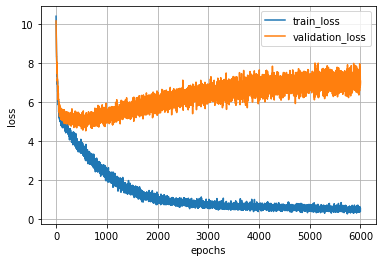

In [ ]:
lr = 0.0001
batch_size = 50
epochs = 5500
gpu = True
show_generate = int(epochs * 0.1)
model = LSTMEncoderDecoder_Attention()
model = train(model, gpu, lr, batch_size, epochs, train_dataset, validation_dataset, show_generate)
torch.save(model.state_dict(), "/content/drive/MyDrive/new_exp/chatbot/LSTM_Attention_chatbot/model_parameters/model512.pth")

In [ ]:
def ans(question):
    QandA(model, question, gpu, show_Q=True, viz=True)

In [ ]:
QandA(model, "hello?", gpu, show_Q=True, viz=True)

Q :  hello?
A :  


''

Q :  hi, how are you doing?
A :  i'm fine. how about fine?


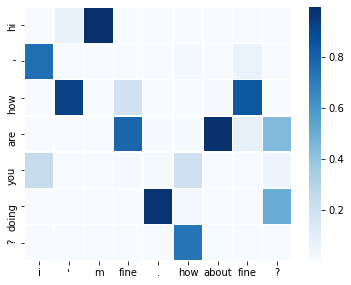

In [ ]:
ans("hi, how are you doing?")

Q :  where are you?
A :  the out're to m to i to s.


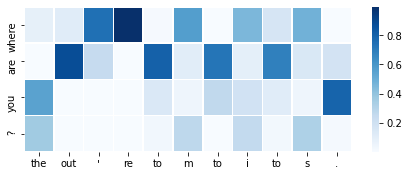

In [ ]:
ans("where are you?")

In [ ]:
def conversation(num, first_question):
    answer = QandA(model, first_question, gpu, tmp=1.0, top_p=0, top_k=40, show_Q=True, viz=False)
    for i in range(num):
        if len(answer) == 0:
            answer = "?"
        answer = QandA(model, answer, gpu, show_Q=False, tmp=1.0, top_p=0, top_k=40, viz=False)

In [ ]:
conversation(20, "where are you?")

Q :  where are you?
A :  i re walk.
A :  the the the the the the that the the the, go.
A :  where much their got of them.. without go of about do, of got say.
A :  i go to the waiter.
A :  you lake coffee, the lake?
A :  yes, yes.
A :  so beautiful is that?
A :  i was half ball. that'i was lot, that all i just love that that the that yes of is.
A :  no, i will gives the like the like, it was, all i'went on the come.
A :  that's good, all fun.
A :  i think your visit give you up?
A :  i think my cemetery have, my favorite good, be, my car it will like there, my be, my be, my me, my going, my be good, my gun.
A :  oh, visit how go or you.
A :  you's a is reason, you sounds like for do.
A :  i am go to come.
A :  that a nice like idea.
A :  yes in really new salad.
A :  ''''''ll think get a to really to go.
A :  come. you feel so out.
A :  it love a gave, that please.
A :  yes in the me in the once.


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/new_exp/chatbot/LSTM_Attention_chatbot/model_parameters/model512.pth")

In [ ]:
from pytorch_transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


epochs :  0
train_loss :  0.4087396562099457
validation_loss 6.884401798248291
~~~~
question :  to the state or the city?
gold answer :  to the city, of course.
Generated Answer :  the''''''''''''''''''''''''''''''''''''''''''''''''
~~~~
elapsed time :  1.734804630279541
epochs :  600
train_loss :  0.3424221873283386
validation_loss 7.430076599121094
~~~~
question :  have you heard from them?
gold answer :  not yet. it's been a week.
Generated Answer :  i haven haven haven haven haven haven haven heard.
~~~~
elapsed time :  964.5397582054138
epochs :  1200
train_loss :  0.4529457092285156
validation_loss 7.125041961669922
~~~~
question :  no, i'm serious.
gold answer :  doesn't that get old?
Generated Answer :  i't want to blind a blind to want to blind a blind to want to blind a blind to want to blind a blind to want to blind a blind to want to blind a blind to want to blind a blind to want to blind a
~~~~
elapsed time :  1920.946453332901
epochs :  1800
train_loss :  0.40671536326408

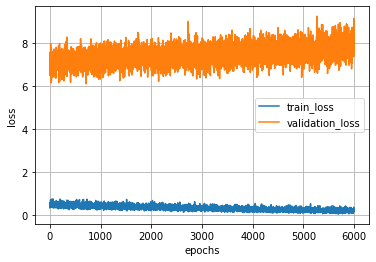

In [ ]:
model = train(model, gpu, lr, batch_size, epochs, train_dataset, validation_dataset, show_generate)

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/new_exp/chatbot/LSTM_Attention_chatbot/model_parameters/model512_2.pth")

Q :  how are you?
A :  i'm about average.


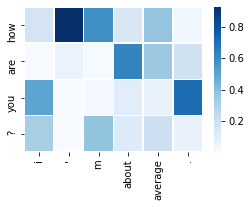

In [ ]:
ans("how are you?")

Q :  where are you?
A :  i'm dogc in m out.


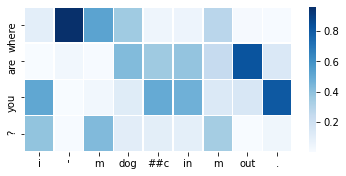

In [ ]:
ans("where are you?")

In [ ]:
ans("you are welcome")

Q :  you are welcome
A :  what are the the not the not the not the the are not the the not the not the not the not the not the the not the the are not the the not the not the the not the the are not the the are not the not


ValueError: ignored

In [ ]:
conversation(20, "where are you?")

In [ ]:
def make_question(question, tokenizer):
    question = tokenizer.tokenize(question)
    q = tokenizer.convert_tokens_to_ids(question)
    return torch.LongTensor(q).unsqueeze(0)
    
def QandA(model, question, gpu, show_Q, tmp=0.9, top_p=0, top_k=40, tokenizer=tokenizer, viz=False):
    if show_Q:
        print("Q : ", question)
    question = make_question(question, tokenizer)
    sep = torch.LongTensor([tokenizer.sep_token_id]).unsqueeze(0)
    cls = torch.LongTensor([tokenizer.cls_token_id]).unsqueeze(0)

    if gpu:
        model = model.cuda()
        question = question.cuda()
        sep = sep.cuda()
        cls = cls.cuda()
    else:
        model = model.cpu()
    with torch.no_grad():
        answ, attention, answ_ids = model.generate2(question, sep, cls, tmp, top_p, top_k)
        print("A : ", answ)
    if len(answ) <= 1:
        viz = False
    if viz:
        visualize_attention(attention, question, answ_ids)
    return answ

In [ ]:
QandA(model, "how are you doing?", gpu, True, 0.9, 0, 40, viz=True)

Q :  how are you doing?
A :  i'' m'm about i fine.


NameError: ignored